In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helper import *

In [71]:
from connection import *

con = connect()

Connection Successful


In [108]:
query = "progression.sql"
data = SQL(query, con)

In [49]:
data.to_csv("data/progression_order.csv")

In [109]:
data

,domain_id,root_id,task_type_id,task_level,progression_order,time_implemented
0,1,20,20,1,0,2012-01-01
1,1,20,20,2,1,2012-01-01
2,1,20,20,3,2,2012-01-01
3,1,20,20,4,3,2012-01-01
4,1,20,20,5,4,2012-01-01
...,...,...,...,...,...,...
1170,14,6,6,5,25,2019-10-08
1171,14,29,174,6,26,2019-10-08
1172,14,7,169,6,27,2019-10-08
1173,14,28,173,6,28,2019-10-08


In [110]:
dates = sorted(pd.unique(data["time_implemented"]))
dates

[numpy.datetime64('2012-01-01T00:00:00.000000000'),
 numpy.datetime64('2017-03-20T00:00:00.000000000'),
 numpy.datetime64('2017-04-04T00:00:00.000000000'),
 numpy.datetime64('2017-12-04T00:00:00.000000000'),
 numpy.datetime64('2019-10-08T00:00:00.000000000')]

In [288]:
df = pd.read_csv("data/context_action.csv")
df.drop(df.columns[[0, 1]], axis=1, inplace=True)
df.head()

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,disorder_id,start_time,start_time_min,end_time,end_time_min,deficit_id
0,635715,15666,20,1,3,0.875,1,1y,1964,2,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}"
1,635715,15666,20,1,3,0.875,1,1y,1964,3,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}"
2,695385,15666,20,1,5,0.800,1,1y,1964,2,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}"
3,695385,15666,20,1,5,0.800,1,1y,1964,3,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}"
4,705234,15666,20,1,5,0.850,1,1y,1964,2,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}"


In [148]:
pd.unique(df["domain_id"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [149]:
disorder_ids = df.groupby("patient_id")["disorder_id"].apply(set).reset_index()
disorder_ids

,patient_id,disorder_id
0,14189,{3}
1,14561,{2}
2,14683,"{2, 3}"
3,14685,{2}
4,14696,{2}
...,...,...
97749,415551,{9}
97750,415603,{2}
97751,415758,{2}
97752,415867,{1}


In [287]:
domain_ids = df.groupby("patient_id")["domain_id"].apply(set).reset_index()
domain_ids

,patient_id,domain_id
0,14189,"{1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14}"
1,14561,"{1, 10, 6}"
2,14683,"{1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14}"
3,14685,"{1, 2, 3, 4, 9, 10, 11, 12, 13, 14}"
4,14696,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}"
...,...,...
95463,415551,"{3, 5, 9, 12, 13}"
95464,415603,"{1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14}"
95465,415758,"{3, 4, 5, 9, 12, 13}"
95466,415867,"{3, 4, 5, 9, 12, 13}"


In [289]:
df = df.drop(columns="disorder_id")
df = df.merge(disorder_ids, on="patient_id", how="left")
df

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,start_time,start_time_min,end_time,end_time_min,deficit_id,disorder_id
0,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}"
1,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}"
2,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}"
3,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}"
4,705234,15666,20,1,5,0.850,1,1y,1964,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}","{2, 3}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61860705,14002360,217018,28,5,7,0.973,14,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}"
61860706,14002360,217018,28,5,7,0.973,14,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}"
61860707,19565141,324494,173,6,1,1.000,14,10y,1947,2019-08-26,2019-08-26 14:17:41,NaN,NaN,{6},{9}
61860708,19782524,325754,188,6,4,0.878,14,1m,1955,2019-09-06,2019-09-06 18:25:21,2019-09-11,2019-09-11 17:11:53,"{3, 4, 5, 6, 7, 8, 9, 10}","{2, 3}"


In [151]:
pd.unique(df["domain_id"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [290]:
df = df.dropna()
df

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,start_time,start_time_min,end_time,end_time_min,deficit_id,disorder_id
0,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}"
1,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}"
2,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}"
3,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}"
4,705234,15666,20,1,5,0.850,1,1y,1964,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}","{2, 3}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61860704,14002360,217018,28,5,7,0.973,14,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}"
61860705,14002360,217018,28,5,7,0.973,14,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}"
61860706,14002360,217018,28,5,7,0.973,14,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}"
61860708,19782524,325754,188,6,4,0.878,14,1m,1955,2019-09-06,2019-09-06 18:25:21,2019-09-11,2019-09-11 17:11:53,"{3, 4, 5, 6, 7, 8, 9, 10}","{2, 3}"


In [291]:
pd.unique(df["domain_id"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [160]:
d11 = df[df.domain_id == 11]
d11[d11.end_time < pd.to_datetime(dates[1])]

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,start_time,start_time_min,end_time,end_time_min,deficit_id,disorder_id
2016,635712,15666,34,1,3,1.000,11,1y,1964,2014-07-31,2014-07-31 00:32:57,2014-07-31,2014-07-31 00:33:40,"{1, 2, 3, 4, 8}","{2, 3}"
2017,635712,15666,34,1,3,1.000,11,1y,1964,2014-07-31,2014-07-31 00:32:57,2014-07-31,2014-07-31 00:33:40,"{1, 2, 3, 4, 8}","{2, 3}"
2018,695394,15666,34,1,5,0.650,11,1y,1964,2014-08-18,2014-08-18 22:24:40,2014-08-18,2014-08-18 22:25:43,"{1, 2, 3, 4, 8}","{2, 3}"
2019,695394,15666,34,1,5,0.650,11,1y,1964,2014-08-18,2014-08-18 22:24:40,2014-08-18,2014-08-18 22:25:43,"{1, 2, 3, 4, 8}","{2, 3}"
2020,705243,15666,34,1,5,1.000,11,1y,1964,2014-08-21,2014-08-21 18:11:07,2014-08-21,2014-08-21 18:12:47,"{1, 2, 3, 4, 8}","{2, 3}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61843295,5006785,85509,35,1,10,1.000,11,2y,1970,2016-10-27,2016-10-27 21:23:48,2016-10-27,2016-10-27 21:25:39,"{1, 2, 3, 4, 5, 6, 7, 8}",{2}
61843296,5075414,85509,35,1,10,0.950,11,2y,1970,2016-11-04,2016-11-04 08:40:53,2016-11-04,2016-11-04 08:42:58,"{1, 2, 3, 4, 5, 6, 7, 8}",{2}
61845745,3136181,58798,35,1,8,0.906,11,6m,1965,2016-02-18,2016-02-18 09:59:18,2016-02-26,2016-02-26 02:37:04,"{1, 3}",{3}
61845746,3136181,58798,35,1,8,0.906,11,6m,1965,2016-02-18,2016-02-18 09:59:18,2016-02-26,2016-02-26 02:37:04,"{1, 3}",{3}


In [83]:
df.dtypes

id                               int64
patient_id                       int64
task_type_id                     int64
task_level                       int64
completed_task_count             int64
accuracy                       float64
domain_id                        int64
condition_since                 object
birth_year                       int64
start_time                      object
start_time_min                  object
end_time                datetime64[ns]
end_time_min                    object
deficit_id                      object
disorder_id                     object
dtype: object

In [112]:
data.dtypes

domain_id                     int64
root_id                       int64
task_type_id                  int64
task_level                    int64
progression_order             int64
end_time             datetime64[ns]
dtype: object

In [292]:
df["end_time"] = pd.to_datetime(df["end_time"])

In [111]:
data.rename(columns={'time_implemented':'end_time'}, inplace=True)


In [293]:
v1_progression = data[data.end_time < pd.to_datetime(dates[1])]
v1_progression

,domain_id,root_id,task_type_id,task_level,progression_order,end_time
0,1,20,20,1,0,2012-01-01
1,1,20,20,2,1,2012-01-01
2,1,20,20,3,2,2012-01-01
3,1,20,20,4,3,2012-01-01
4,1,20,20,5,4,2012-01-01
...,...,...,...,...,...,...
256,14,8,8,5,25,2012-01-01
257,14,29,29,5,26,2012-01-01
258,14,7,7,5,27,2012-01-01
259,14,28,28,5,28,2012-01-01


In [294]:
v1_df = df[df.end_time < pd.to_datetime(dates[1])]
v1_df

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,start_time,start_time_min,end_time,end_time_min,deficit_id,disorder_id
0,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}"
1,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}"
2,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}"
3,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}"
4,705234,15666,20,1,5,0.850,1,1y,1964,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}","{2, 3}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61856072,6343016,108029,28,4,2,1.000,14,6m,1970,2017-03-13,2017-03-13 18:57:50,2017-03-13,2017-03-13 18:58:31,{3},{1}
61856081,6371075,108409,28,4,3,1.000,14,1y,2013,2017-03-15,2017-03-15 22:30:56,2017-03-15,2017-03-15 22:31:42,{3},{9999}
61856082,6371075,108409,28,4,3,1.000,14,1y,2013,2017-03-15,2017-03-15 22:30:56,2017-03-15,2017-03-15 22:31:42,{3},{9999}
61856083,6371075,108409,28,4,3,1.000,14,1y,2013,2017-03-15,2017-03-15 22:30:56,2017-03-15,2017-03-15 22:31:42,{3},{9999}


In [295]:
pd.unique(v1_df["domain_id"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [296]:
v1_df = v1_df.merge(v1_progression, left_on=["task_type_id", "task_level", "domain_id"], right_on=["task_type_id", "task_level", "domain_id"])
v1_df

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,start_time,start_time_min,end_time_x,end_time_min,deficit_id,disorder_id,root_id,progression_order,end_time_y
0,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
1,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
2,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
3,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
4,705234,15666,20,1,5,0.850,1,1y,1964,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18746885,5004080,88528,75,1,2,0.950,8,2y,1986,2016-10-27,2016-10-27 17:44:49,2016-11-02,2016-11-02 00:01:12,{8},{1},75,3,2012-01-01
18746886,5004080,88528,75,1,2,0.950,8,2y,1986,2016-10-27,2016-10-27 17:44:49,2016-11-02,2016-11-02 00:01:12,{8},{1},75,3,2012-01-01
18746887,5966203,99214,75,1,5,0.300,8,1y,1960,2017-02-07,2017-02-07 00:36:40,2017-02-07,2017-02-07 00:40:55,"{1, 2, 3}",{2},75,3,2012-01-01
18746888,5966203,99214,75,1,5,0.300,8,1y,1960,2017-02-07,2017-02-07 00:36:40,2017-02-07,2017-02-07 00:40:55,"{1, 2, 3}",{2},75,3,2012-01-01


In [387]:
len(pd.unique(v1_df["patient_id"]))

20308

In [385]:
v1_df

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,start_time,start_time_min,end_time_x,end_time_min,deficit_id,disorder_id,root_id,progression_order,end_time_y
0,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
1,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
2,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
3,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
4,705234,15666,20,1,5,0.850,1,1y,1964,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18746885,5004080,88528,75,1,2,0.950,8,2y,1986,2016-10-27,2016-10-27 17:44:49,2016-11-02,2016-11-02 00:01:12,{8},{1},75,3,2012-01-01
18746886,5004080,88528,75,1,2,0.950,8,2y,1986,2016-10-27,2016-10-27 17:44:49,2016-11-02,2016-11-02 00:01:12,{8},{1},75,3,2012-01-01
18746887,5966203,99214,75,1,5,0.300,8,1y,1960,2017-02-07,2017-02-07 00:36:40,2017-02-07,2017-02-07 00:40:55,"{1, 2, 3}",{2},75,3,2012-01-01
18746888,5966203,99214,75,1,5,0.300,8,1y,1960,2017-02-07,2017-02-07 00:36:40,2017-02-07,2017-02-07 00:40:55,"{1, 2, 3}",{2},75,3,2012-01-01


In [382]:
d = v1_df[v1_df.domain_id == 14]
d = d.drop_duplicates(subset="id")

In [301]:
temp = d.loc[d.groupby("patient_id")["progression_order"].idxmin()]

In [305]:
temp = d.loc[d.groupby("patient_id")["progression_order"].idxmax()]

In [383]:
temp = d

<Axes: xlabel='progression_order', ylabel='Count'>

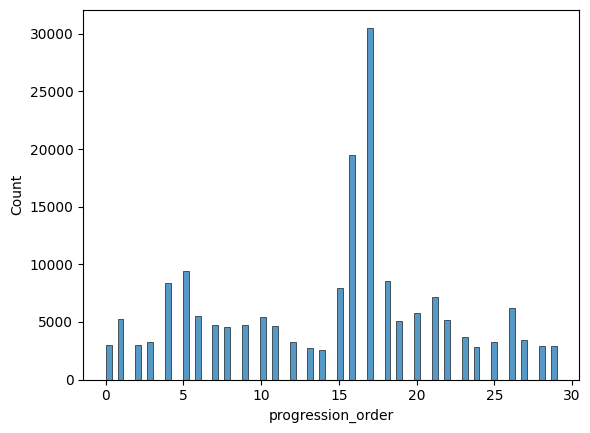

In [384]:
sns.histplot(data=temp, x="progression_order")

In [169]:
d1.loc[d1.groupby("patient_id")["progression_order"].idxmin()]

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,start_time,start_time_min,end_time_x,end_time_min,deficit_id,disorder_id,root_id,progression_order,end_time_y
13245108,583050,14189,20,2,3,1.000,1,5y,1970,2014-07-11,2014-07-11 22:58:04,2014-07-11,2014-07-11 22:58:53,"{2, 4}",{3},20,1,2012-01-01
13270816,4046469,14561,20,2,1,1.000,1,2y,1942,2016-07-07,2016-07-07 00:39:15,2016-07-14,2016-07-14 01:11:47,"{3, 4}",{2},20,1,2012-01-01
13257024,1311613,14683,20,2,5,0.960,1,6m,1940,2015-01-29,2015-01-29 22:38:02,2015-01-29,2015-01-29 22:41:36,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",20,1,2012-01-01
13245120,601341,14685,20,2,3,0.667,1,1y,1954,2014-07-19,2014-07-19 16:26:06,2014-07-19,2014-07-19 16:27:51,"{8, 5, 6, 7}",{2},20,1,2012-01-01
13245136,601755,14696,20,2,2,0.500,1,2y,1937,2014-07-19,2014-07-19 15:18:50,2014-07-19,2014-07-19 15:20:10,"{1, 3, 4, 5, 6, 8}",{2},20,1,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300776,6404992,108804,37,1,3,0.959,1,6m,1981,2017-03-19,2017-03-19 19:07:34,2017-03-19,2017-03-19 19:07:53,"{1, 2, 3, 4, 5, 6, 7, 8}",{1},37,10,2012-01-01
523268,6406379,108816,37,1,3,1.000,1,10y,1995,2017-03-19,2017-03-19 21:53:49,2017-03-19,2017-03-19 21:54:30,"{1, 2, 3, 4, 5, 6, 8}",{4},37,10,2012-01-01
523272,6407127,108829,37,1,3,0.417,1,2y,1991,2017-03-19,2017-03-19 23:49:12,2017-03-19,2017-03-19 23:51:09,"{2, 3, 4, 5, 6, 7, 8}",{9999},37,10,2012-01-01
109152,6407134,108830,37,1,3,0.542,1,1y,1974,2017-03-19,2017-03-19 23:48:44,2017-03-19,2017-03-19 23:50:25,"{1, 2, 3, 4, 5, 6, 7, 8}",{2},37,10,2012-01-01


In [125]:
pd.to_datetime(dates[2])

Timestamp('2017-04-04 00:00:00')

In [101]:
v1_df = final_df[final_df.end_time < pd.to_datetime(dates[2])]
v1_df

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id_x,condition_since,birth_year,start_time,start_time_min,end_time,end_time_min,deficit_id,disorder_id,domain_id_y,root_id,progression_order
0,6407571,15796,12,2,11,0.727,2,5y,1950,2017-03-20,2017-03-20 00:47:34,2017-03-20,2017-03-20 00:56:04,"{1, 2, 3, 4, 8}","{2, 3}",2,12,3
1,6410331,95687,12,2,10,0.800,2,1y,1954,2017-03-20,2017-03-20 14:31:53,2017-03-20,2017-03-20 14:35:57,"{2, 3, 4, 9999}","{2, 3, 9999}",2,12,3
2,6409298,105590,12,2,6,0.667,2,2y,1958,2017-03-20,2017-03-20 12:58:41,2017-03-20,2017-03-20 13:00:54,"{1, 4, 5, 6, 8}",{1},2,12,3
3,6409350,45763,12,2,10,1.000,2,5y,1985,2017-03-20,2017-03-20 13:03:29,2017-03-20,2017-03-20 13:07:41,"{1, 2, 3, 4, 5, 6, 7, 8}",{3},2,12,3
4,6409399,98128,12,2,8,1.000,2,1y,1947,2017-03-20,2017-03-20 13:07:25,2017-03-20,2017-03-20 13:11:19,"{1, 2, 3, 4, 5, 6, 7, 8}",{2},2,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,6419116,100782,45,4,5,1.000,9,6m,1964,2017-03-20,2017-03-20 23:14:08,2017-03-20,2017-03-20 23:15:14,"{8, 3, 5}",{1},9,45,7
22712,6411390,104563,45,4,2,1.000,9,5y,1937,2017-03-20,2017-03-20 15:02:44,2017-03-20,2017-03-20 15:03:04,"{8, 3, 4, 6}","{8, 3}",9,45,7
22713,6407648,104930,45,4,10,0.801,9,2y,1960,2017-03-20,2017-03-20 01:09:49,2017-03-20,2017-03-20 01:16:25,"{4, 5, 6, 7, 8}",{9},9,45,7
22714,6416747,92654,45,4,10,0.900,9,6m,1942,2017-03-20,2017-03-20 20:12:29,2017-03-20,2017-03-20 20:14:45,"{5, 6}",{2},9,45,7


In [36]:
p = df[df["patient_id"] == 45118]
p = p.drop_duplicates(subset="id")
p

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,disorder_id,start_time,start_time_min,end_time,end_time_min,deficit_id
40304437,2249777,45118,37,1,3,0.459,1,6m,1947,2,2015-08-21,2015-08-21 15:29:53,2015-08-21,2015-08-21 15:32:20,"{1, 2, 3, 4}"
40304439,2259506,45118,37,1,8,0.765,1,6m,1947,2,2015-08-23,2015-08-23 23:07:23,2015-08-31,2015-08-31 00:04:15,"{1, 2, 3, 4}"
40304441,2361763,45118,37,1,12,0.875,1,6m,1947,2,2015-09-15,2015-09-15 00:33:12,2018-01-14,2018-01-14 22:04:10,"{1, 2, 3, 4}"
40304443,9829165,45118,37,1,12,0.739,1,6m,1947,2,2018-01-19,2018-01-19 12:48:18,2018-01-19,2018-01-19 13:00:19,"{1, 2, 3, 4}"
40304445,9835216,45118,37,1,10,0.800,1,6m,1947,2,2018-01-19,2018-01-19 18:15:34,2018-01-19,2018-01-19 18:24:47,"{1, 2, 3, 4}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40305307,9893370,45118,29,3,10,0.817,14,6m,1947,2,2018-01-28,2018-01-28 16:11:17,2018-01-28,2018-01-28 16:26:28,"{1, 2, 3, 4}"
40305309,10102951,45118,29,3,10,0.883,14,6m,1947,2,2018-02-08,2018-02-08 15:10:43,2018-02-08,2018-02-08 15:17:22,"{1, 2, 3, 4}"
40305311,10247350,45118,29,3,10,0.729,14,6m,1947,2,2018-02-19,2018-02-19 14:44:19,2018-02-19,2018-02-19 14:56:02,"{1, 2, 3, 4}"
40305313,10327461,45118,29,3,10,0.734,14,6m,1947,2,2018-02-24,2018-02-24 17:07:06,2018-02-24,2018-02-24 17:15:26,"{1, 2, 3, 4}"


In [18]:
p.nunique()

id                      74
patient_id               1
task_type_id            11
task_level               4
completed_task_count    12
accuracy                59
domain_id                6
condition_since          1
birth_year               1
disorder_id              1
start_time              12
start_time_min          74
end_time                14
end_time_min            69
deficit_id               1
dtype: int64

In [19]:
progression = SQL("select * from constant_therapy.task_progression where time_implemented = '2012-01-01 00:00:00';", con)
progression

,domain_id,root_id,task_type_id,task_level,progression_order,time_implemented
0,1,20,20,1,0,2012-01-01
1,1,20,20,2,1,2012-01-01
2,1,20,20,3,2,2012-01-01
3,1,20,20,4,3,2012-01-01
4,1,20,20,5,4,2012-01-01
...,...,...,...,...,...,...
256,14,8,8,5,25,2012-01-01
257,14,29,29,5,26,2012-01-01
258,14,7,7,5,27,2012-01-01
259,14,28,28,5,28,2012-01-01


In [37]:
p = p.merge(progression, how="left")
p

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,disorder_id,start_time,start_time_min,end_time,end_time_min,deficit_id,root_id,progression_order,time_implemented
0,2249777,45118,37,1,3,0.459,1,6m,1947,2,2015-08-21,2015-08-21 15:29:53,2015-08-21,2015-08-21 15:32:20,"{1, 2, 3, 4}",37.0,10.0,2012-01-01
1,2259506,45118,37,1,8,0.765,1,6m,1947,2,2015-08-23,2015-08-23 23:07:23,2015-08-31,2015-08-31 00:04:15,"{1, 2, 3, 4}",37.0,10.0,2012-01-01
2,2361763,45118,37,1,12,0.875,1,6m,1947,2,2015-09-15,2015-09-15 00:33:12,2018-01-14,2018-01-14 22:04:10,"{1, 2, 3, 4}",37.0,10.0,2012-01-01
3,9829165,45118,37,1,12,0.739,1,6m,1947,2,2018-01-19,2018-01-19 12:48:18,2018-01-19,2018-01-19 13:00:19,"{1, 2, 3, 4}",37.0,10.0,2012-01-01
4,9835216,45118,37,1,10,0.800,1,6m,1947,2,2018-01-19,2018-01-19 18:15:34,2018-01-19,2018-01-19 18:24:47,"{1, 2, 3, 4}",37.0,10.0,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,9893370,45118,29,3,10,0.817,14,6m,1947,2,2018-01-28,2018-01-28 16:11:17,2018-01-28,2018-01-28 16:26:28,"{1, 2, 3, 4}",29.0,16.0,2012-01-01
70,10102951,45118,29,3,10,0.883,14,6m,1947,2,2018-02-08,2018-02-08 15:10:43,2018-02-08,2018-02-08 15:17:22,"{1, 2, 3, 4}",29.0,16.0,2012-01-01
71,10247350,45118,29,3,10,0.729,14,6m,1947,2,2018-02-19,2018-02-19 14:44:19,2018-02-19,2018-02-19 14:56:02,"{1, 2, 3, 4}",29.0,16.0,2012-01-01
72,10327461,45118,29,3,10,0.734,14,6m,1947,2,2018-02-24,2018-02-24 17:07:06,2018-02-24,2018-02-24 17:15:26,"{1, 2, 3, 4}",29.0,16.0,2012-01-01


In [38]:
p = p.loc[p.groupby("domain_id")["progression_order"].idxmin()]

In [39]:
p[["domain_id", "progression_order"]]

,domain_id,progression_order
0,1,10.0
15,4,2.0
27,5,2.0
38,6,1.0
61,10,4.0
62,14,16.0


<Axes: xlabel='domain_id', ylabel='progression_order'>

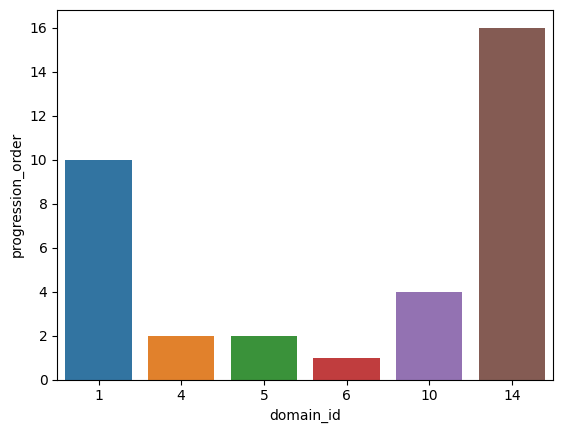

2023-06-12 11:26:53,386| ERROR   | Could not establish connection from local ('192.168.128.165', 60910) to remote ('ctprod.cktdvwrzgusc.us-east-1.rds.amazonaws.com', 3306) side of the tunnel: open new channel ssh error: SSH session not active
2023-06-12 11:26:53,388| ERROR   | Could not establish connection from local ('192.168.128.165', 60910) to remote ('ctprod.cktdvwrzgusc.us-east-1.rds.amazonaws.com', 3306) side of the tunnel: open new channel ssh error: SSH session not active
2023-06-12 11:26:53,391| ERROR   | Could not establish connection from local ('192.168.128.165', 60910) to remote ('ctprod.cktdvwrzgusc.us-east-1.rds.amazonaws.com', 3306) side of the tunnel: open new channel ssh error: SSH session not active
2023-06-12 11:26:53,393| ERROR   | Could not establish connection from local ('192.168.128.165', 60910) to remote ('ctprod.cktdvwrzgusc.us-east-1.rds.amazonaws.com', 3306) side of the tunnel: open new channel ssh error: SSH session not active
Bad pipe message: %s [b'\xe8

In [ ]:
sns.barplot(data=p[["domain_id", "progression_order"]], x="domain_id", y="progression_order", )

<Axes: xlabel='domain_id', ylabel='progression_order'>

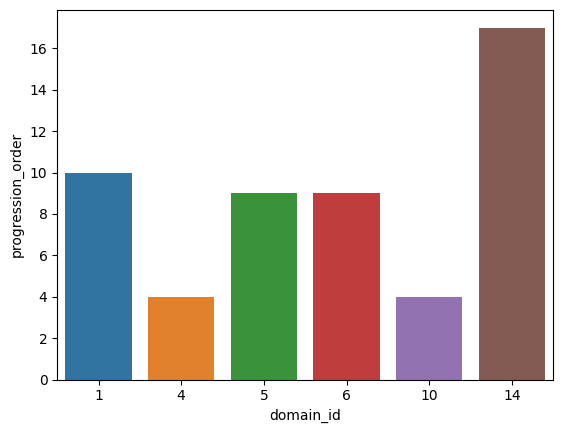

In [35]:
sns.barplot(data=p[["domain_id", "progression_order"]], x="domain_id", y="progression_order", )

In [94]:
disorder3 = df[df["disorder_id"] == 3]
disorder9 = df[df["disorder_id"] == 9]

In [5]:
df.dtypes

id                        int64
patient_id                int64
task_type_id              int64
task_level                int64
completed_task_count      int64
accuracy                float64
domain_id                 int64
condition_since          object
birth_year                int64
disorder_id               int64
start_time               object
start_time_min           object
end_time                 object
end_time_min             object
deficit_id               object
dtype: object

In [32]:
df = df.sort_values(by="start_time_min")

In [33]:
df["patient_id"]

10864249     14189
10864246     14189
10864243     14189
10864268     14189
10864329     14189
             ...  
55298156    352770
53081377    270236
53081587    270236
53081631    270236
53081893    270236
Name: patient_id, Length: 61860710, dtype: int64

In [35]:
p1 = df[df["patient_id"] == 14189]

<Axes: >

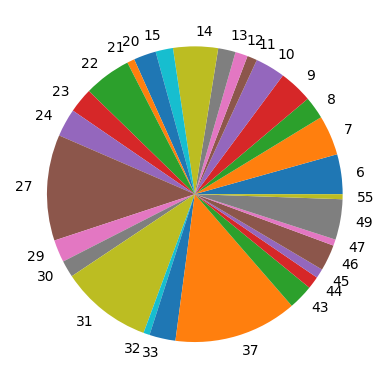

In [37]:
p1.groupby("task_type_id").size().plot.pie()

In [39]:
t1 = p1[p1["task_type_id"] == 37]

In [43]:
t1 = t1.drop_duplicates(subset="id")

In [47]:
t1

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,disorder_id,start_time,start_time_min,end_time,end_time_min,deficit_id
10863097,583047,14189,37,1,3,0.875,1,5y,1970,3,2014-07-11,2014-07-11 22:49:03,2014-07-11,2014-07-11 22:50:48,"{2, 4}"
10863826,585731,14189,37,1,5,0.875,11,5y,1970,3,2014-07-13,2014-07-13 17:13:11,2014-07-13,2014-07-13 17:17:21,"{2, 4}"
10863039,588932,14189,37,1,5,0.875,1,5y,1970,3,2014-07-14,2014-07-14 22:15:50,2014-07-14,2014-07-14 22:20:51,"{2, 4}"
10863100,771844,14189,37,1,5,0.950,1,5y,1970,3,2014-10-14,2014-10-14 22:41:31,2014-10-14,2014-10-14 22:45:58,"{2, 4}"
10863041,891598,14189,37,1,5,0.800,1,5y,1970,3,2014-10-15,2014-10-15 19:04:07,2014-10-15,2014-10-15 19:08:56,"{2, 4}"
10863812,899532,14189,37,1,5,0.775,11,5y,1970,3,2014-10-17,2014-10-17 22:02:30,2014-10-17,2014-10-17 22:09:27,"{2, 4}"
10863741,901037,14189,37,1,5,0.650,10,5y,1970,3,2014-10-20,2014-10-20 20:39:44,2014-10-20,2014-10-20 20:50:52,"{2, 4}"
10863850,911716,14189,37,1,5,0.925,11,5y,1970,3,2014-10-21,2014-10-21 21:42:48,2014-10-21,2014-10-21 21:50:32,"{2, 4}"
10863797,930358,14189,37,1,10,0.862,10,5y,1970,3,2014-10-27,2014-10-27 16:54:53,2014-10-27,2014-10-27 17:08:44,"{2, 4}"
10863798,938498,14189,37,1,10,0.900,10,5y,1970,3,2014-11-01,2014-11-01 16:09:43,2014-11-01,2014-11-01 16:29:30,"{2, 4}"


<Axes: xlabel='start_time', ylabel='accuracy'>

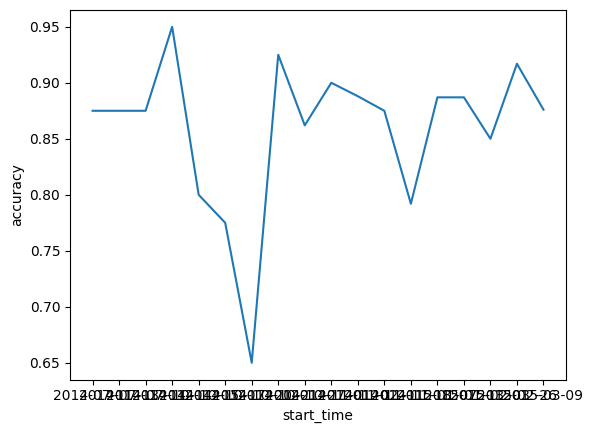

In [48]:
sns.lineplot(data=t1, x="start_time", y="accuracy")

<Axes: xlabel='start_time', ylabel='task_level'>

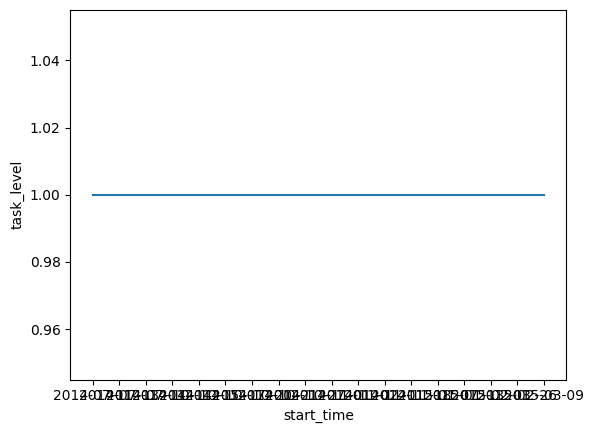

In [50]:
sns.lineplot(data=t1, x="start_time", y="task_level")

In [54]:
patient_groupby = df.drop_duplicates(subset="id").groupby("patient_id")
patient_groupby.head()

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,disorder_id,start_time,start_time_min,end_time,end_time_min,deficit_id
10864249,583031,14189,30,1,2,0.625,14,5y,1970,3,2014-07-11,2014-07-11 22:04:14,2014-07-11,2014-07-11 22:04:30,"{2, 4}"
10864268,583032,14189,8,4,2,1.000,14,5y,1970,3,2014-07-11,2014-07-11 22:05:58,2014-07-11,2014-07-11 22:06:28,"{2, 4}"
10863538,583033,14189,9,1,3,0.667,7,5y,1970,3,2014-07-11,2014-07-11 22:07:34,2014-07-11,2014-07-11 22:08:05,"{2, 4}"
10863519,583034,14189,10,2,3,1.000,6,5y,1970,3,2014-07-11,2014-07-11 22:08:48,2014-07-11,2014-07-11 22:09:08,"{2, 4}"
10864252,583035,14189,29,1,2,0.750,14,5y,1970,3,2014-07-11,2014-07-11 22:09:24,2014-07-11,2014-07-11 22:09:40,"{2, 4}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61395835,25184825,341598,165,2,6,0.833,4,3m,1959,2,2020-06-29,2020-06-29 17:18:42,2020-06-29,2020-06-29 17:20:39,"{3, 4, 6, 7}"
61840777,25187846,346518,64,2,10,0.900,10,1m,1948,2,2020-06-29,2020-06-29 19:12:59,2020-06-29,2020-06-29 19:15:16,{3}
55331792,25223394,337856,12,3,1,0.000,2,2y,1940,2,2020-07-01,2020-07-01 19:03:10,2020-07-01,2020-07-01 19:03:10,"{2, 3, 7}"
55331869,25265907,337856,15,1,1,1.000,9,2y,1940,3,2020-07-04,2020-07-04 20:15:13,2020-07-04,2020-07-04 20:15:13,"{2, 3, 7}"


In [59]:
disorder3_groupby = disorder3.drop_duplicates(subset="id").groupby("patient_id")
disorder3_groupby.head()

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,disorder_id,start_time,start_time_min,end_time,end_time_min,deficit_id
1,635715,15666,20,1,3,0.875,1,1y,1964,3,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}"
3,695385,15666,20,1,5,0.800,1,1y,1964,3,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}"
5,705234,15666,20,1,5,0.850,1,1y,1964,3,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}"
7,4929693,15666,20,1,5,0.800,1,1y,1964,3,2016-10-19,2016-10-19 20:47:01,2016-10-19,2016-10-19 20:48:29,"{1, 2, 3, 4, 8}"
33,5429562,15666,37,1,5,0.800,1,1y,1964,3,2016-12-13,2016-12-13 01:14:14,2016-12-13,2016-12-13 01:16:24,"{1, 2, 3, 4, 8}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61860658,9099376,144205,29,5,7,0.809,14,2y,1975,3,2017-11-17,2017-11-17 15:24:11,2017-11-22,2017-11-22 21:01:34,"{1, 2, 3, 4, 6}"
61860683,14061511,217018,7,5,10,0.908,14,6m,1943,3,2018-11-05,2018-11-05 15:52:25,2018-11-05,2018-11-05 16:08:50,{3}
61860685,14062555,217018,7,5,10,0.978,14,6m,1943,3,2018-11-05,2018-11-05 16:16:53,2018-11-05,2018-11-05 16:27:40,{3}
61860687,14002360,217018,28,5,7,0.973,14,6m,1943,3,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3}


In [62]:
disorder3_groupby.groups.keys()

dict_keys([14189, 14683, 15224, 15230, 15284, 15316, 15436, 15666, 15671, 15753, 15796, 15800, 15901, 15923, 15974, 16042, 16171, 16261, 16377, 16387, 16477, 16497, 16507, 16518, 16569, 16592, 16727, 16922, 16982, 17016, 17040, 17055, 17287, 17424, 17475, 17505, 17637, 17746, 17749, 17768, 17777, 17799, 17820, 17944, 17992, 18046, 18065, 18082, 18224, 18359, 18371, 18387, 18393, 18435, 18448, 18917, 18921, 18963, 19036, 19144, 19272, 19282, 19369, 19399, 19486, 19509, 19895, 19925, 19989, 20284, 20321, 20389, 20497, 20739, 20856, 20857, 20880, 20895, 20896, 20897, 20901, 20977, 21022, 21034, 21049, 21062, 21068, 21203, 21260, 21277, 21301, 21516, 21594, 21619, 21621, 21721, 21766, 21869, 21936, 21963, 21991, 22233, 22251, 22353, 22437, 22472, 22893, 22906, 23132, 23140, 23186, 23208, 23222, 23289, 23376, 23495, 23510, 23552, 23736, 23739, 23778, 23848, 24062, 24133, 24159, 24211, 24353, 24455, 24645, 24677, 24686, 24687, 24784, 24788, 24803, 24822, 24874, 24953, 25046, 25058, 25072, 25

In [64]:
p = disorder3[disorder3["patient_id"] == 14683]
p

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,disorder_id,start_time,start_time_min,end_time,end_time_min,deficit_id
13978414,1311613,14683,20,2,5,0.960,1,6m,1940,3,2015-01-29,2015-01-29 22:38:02,2015-01-29,2015-01-29 22:41:36,"{1, 2, 3, 4, 5, 6, 7, 8}"
13978416,1312343,14683,20,2,5,0.980,1,6m,1940,3,2015-01-30,2015-01-30 02:09:05,2015-01-30,2015-01-30 02:11:10,"{1, 2, 3, 4, 5, 6, 7, 8}"
13978418,1316207,14683,20,2,5,0.980,1,6m,1940,3,2015-01-30,2015-01-30 23:09:31,2015-01-30,2015-01-30 23:11:32,"{1, 2, 3, 4, 5, 6, 7, 8}"
13978420,1318865,14683,20,2,5,0.980,1,6m,1940,3,2015-01-31,2015-01-31 18:34:03,2015-01-31,2015-01-31 18:35:36,"{1, 2, 3, 4, 5, 6, 7, 8}"
13978422,1319681,14683,20,2,5,1.000,1,6m,1940,3,2015-01-31,2015-01-31 22:26:41,2015-01-31,2015-01-31 22:28:07,"{1, 2, 3, 4, 5, 6, 7, 8}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13983470,1388365,14683,30,5,5,0.974,14,6m,1940,3,2015-02-17,2015-02-17 01:06:09,2015-02-17,2015-02-17 01:12:08,"{1, 2, 3, 4, 5, 6, 7, 8}"
13983472,1392812,14683,30,5,7,0.970,14,6m,1940,3,2015-02-18,2015-02-18 01:52:52,2015-02-18,2015-02-18 02:03:54,"{1, 2, 3, 4, 5, 6, 7, 8}"
13983474,1397418,14683,30,5,7,0.963,14,6m,1940,3,2015-02-19,2015-02-19 21:15:00,2015-02-19,2015-02-19 21:22:18,"{1, 2, 3, 4, 5, 6, 7, 8}"
13983476,1401971,14683,30,5,7,1.000,14,6m,1940,3,2015-02-20,2015-02-20 19:43:39,2015-02-20,2015-02-20 19:48:49,"{1, 2, 3, 4, 5, 6, 7, 8}"


In [65]:
pd.unique(p["task_type_id"])

array([20, 21, 37, 22, 11, 12, 13, 27, 32, 46, 42, 16, 44, 48, 26,  1,  4,
        5,  9, 10, 15, 41, 64, 17, 34, 24, 53, 25, 47, 23,  8, 30, 29])

In [66]:
p[p["task_type_id"] == 20]

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,disorder_id,start_time,start_time_min,end_time,end_time_min,deficit_id
13978414,1311613,14683,20,2,5,0.960,1,6m,1940,3,2015-01-29,2015-01-29 22:38:02,2015-01-29,2015-01-29 22:41:36,"{1, 2, 3, 4, 5, 6, 7, 8}"
13978416,1312343,14683,20,2,5,0.980,1,6m,1940,3,2015-01-30,2015-01-30 02:09:05,2015-01-30,2015-01-30 02:11:10,"{1, 2, 3, 4, 5, 6, 7, 8}"
13978418,1316207,14683,20,2,5,0.980,1,6m,1940,3,2015-01-30,2015-01-30 23:09:31,2015-01-30,2015-01-30 23:11:32,"{1, 2, 3, 4, 5, 6, 7, 8}"
13978420,1318865,14683,20,2,5,0.980,1,6m,1940,3,2015-01-31,2015-01-31 18:34:03,2015-01-31,2015-01-31 18:35:36,"{1, 2, 3, 4, 5, 6, 7, 8}"
13978422,1319681,14683,20,2,5,1.000,1,6m,1940,3,2015-01-31,2015-01-31 22:26:41,2015-01-31,2015-01-31 22:28:07,"{1, 2, 3, 4, 5, 6, 7, 8}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13978580,1356484,14683,20,5,6,0.937,1,6m,1940,3,2015-02-09,2015-02-09 19:12:21,2015-02-09,2015-02-09 19:19:09,"{1, 2, 3, 4, 5, 6, 7, 8}"
13978582,1360951,14683,20,5,6,0.948,1,6m,1940,3,2015-02-10,2015-02-10 17:24:29,2015-02-10,2015-02-10 17:30:02,"{1, 2, 3, 4, 5, 6, 7, 8}"
13978584,1367254,14683,20,5,6,0.958,1,6m,1940,3,2015-02-11,2015-02-11 20:48:18,2015-02-11,2015-02-11 20:53:37,"{1, 2, 3, 4, 5, 6, 7, 8}"
13978586,1371673,14683,20,5,6,0.968,1,6m,1940,3,2015-02-12,2015-02-12 19:21:30,2015-02-12,2015-02-12 19:26:29,"{1, 2, 3, 4, 5, 6, 7, 8}"


<Axes: xlabel='start_time', ylabel='task_level'>

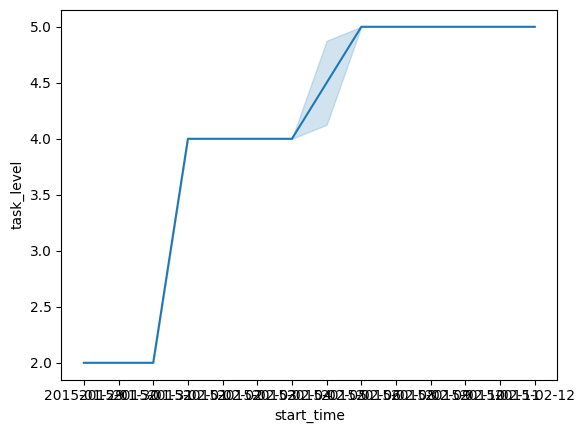

In [67]:
sns.lineplot(data=p[p["task_type_id"] == 20], x="start_time", y="task_level")

<Axes: xlabel='start_time', ylabel='task_level'>

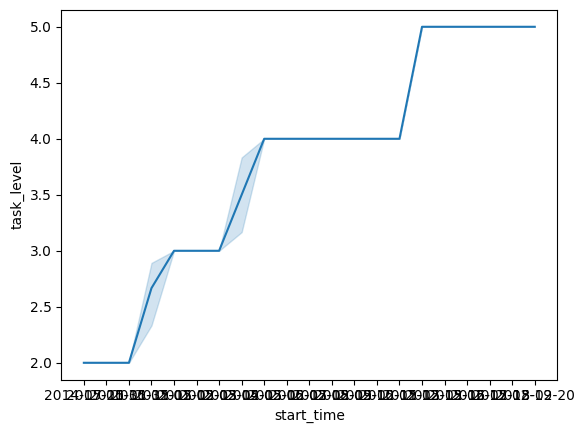

In [68]:
sns.lineplot(data=p[p["task_type_id"] == 30], x="start_time", y="task_level")

<Axes: xlabel='start_time', ylabel='accuracy'>

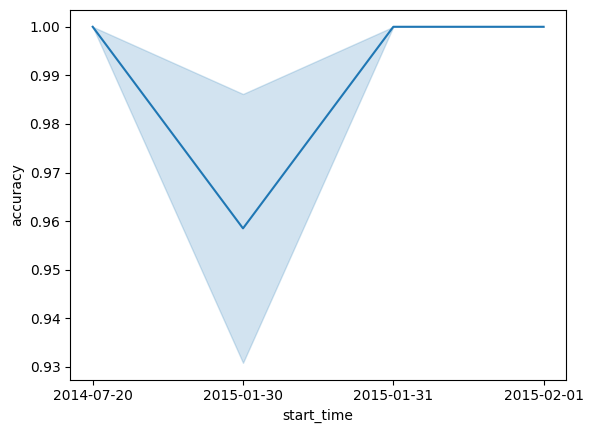

In [71]:
d = p[p["task_type_id"] == 30]
sns.lineplot(data=d[d["task_level"] == 2], x="start_time", y="accuracy")

<Axes: xlabel='start_time', ylabel='accuracy'>

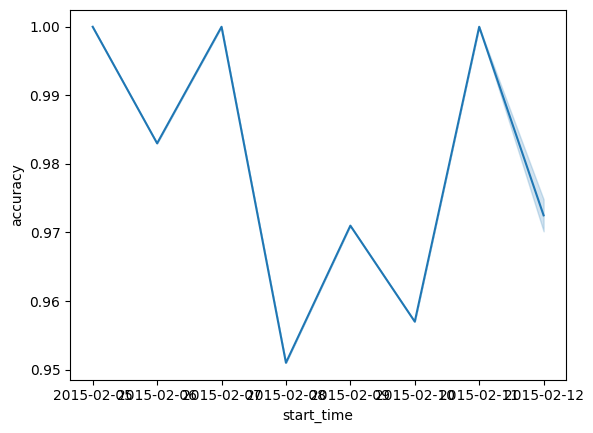

In [73]:
sns.lineplot(data=d[d["task_level"] == 4], x="start_time", y="accuracy")

<Axes: xlabel='start_time', ylabel='accuracy'>

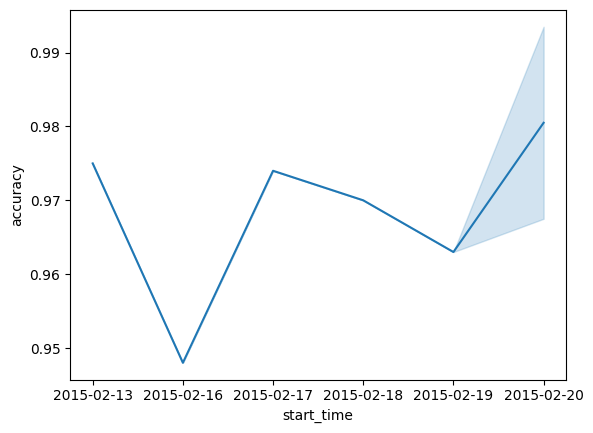

In [74]:
sns.lineplot(data=d[d["task_level"] == 5], x="start_time", y="accuracy")

In [89]:
d = p[p["task_type_id"] == 27]

<Axes: xlabel='start_time', ylabel='task_level'>

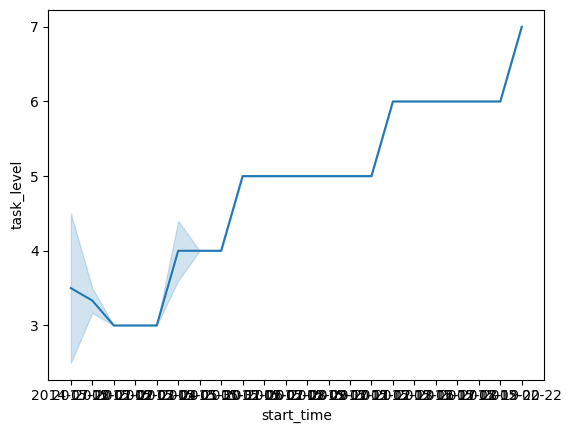

In [90]:
sns.lineplot(data=d, x="start_time", y="task_level")

<Axes: xlabel='start_time', ylabel='accuracy'>

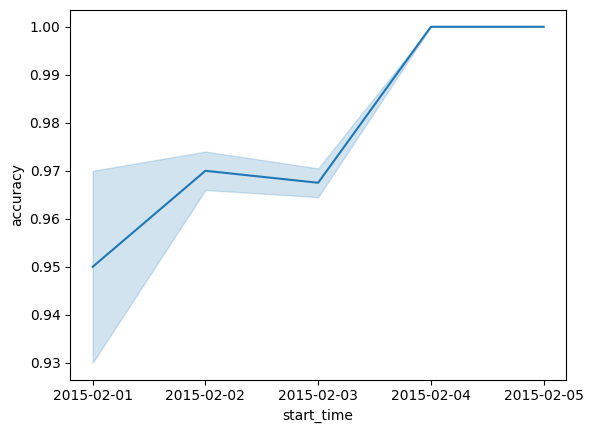

In [93]:
sns.lineplot(data=d[d["task_level"] == 3], x="start_time", y="accuracy")

<Axes: xlabel='start_time', ylabel='accuracy'>

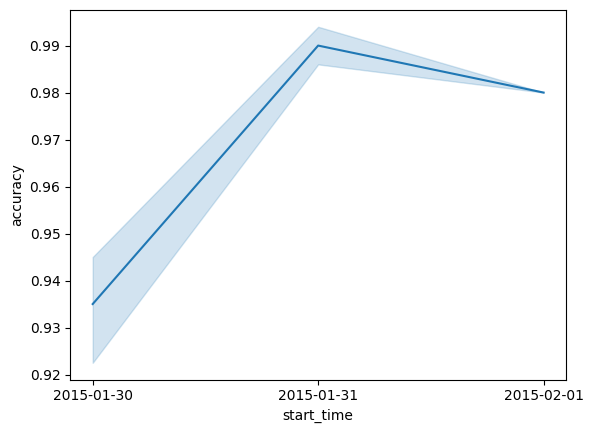

In [91]:
sns.lineplot(data=d[d["task_level"] == 4], x="start_time", y="accuracy")

In [95]:
disorder9_groupby = disorder9.drop_duplicates(subset="id").groupby("patient_id")
disorder9_groupby.head()

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,disorder_id,start_time,start_time_min,end_time,end_time_min,deficit_id
6303092,7531505,114484,20,1,10,1.000,1,2y,1962,9,2017-07-07,2017-07-07 18:53:00,2017-07-07,2017-07-07 18:55:18,"{4, 5, 6, 7, 8}"
6303094,7539140,114484,20,1,10,0.975,1,2y,1962,9,2017-07-08,2017-07-08 00:57:45,2017-07-08,2017-07-08 01:00:44,"{4, 5, 6, 7, 8}"
6303096,7546209,114484,20,1,10,1.000,1,2y,1962,9,2017-07-09,2017-07-09 01:47:38,2017-07-09,2017-07-09 01:49:57,"{4, 5, 6, 7, 8}"
6303098,7550159,114484,20,1,10,1.000,1,2y,1962,9,2017-07-09,2017-07-09 20:02:26,2017-07-09,2017-07-09 20:04:23,"{4, 5, 6, 7, 8}"
6303100,7552971,114484,20,1,10,1.000,1,2y,1962,9,2017-07-10,2017-07-10 01:24:37,2017-07-10,2017-07-10 01:26:42,"{4, 5, 6, 7, 8}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61860507,14192253,225411,28,4,1,0.042,14,>10y,1912,9,2018-11-13,2018-11-13 05:36:20,2018-11-13,2018-11-13 05:36:56,{3}
61860619,14209841,225772,28,4,1,1.000,14,6m,1997,9,2018-11-14,2018-11-14 01:04:18,2018-11-14,2018-11-14 01:04:27,{3}
61860623,14210227,225783,28,4,3,1.000,14,>10y,1980,9,2018-11-14,2018-11-14 01:45:32,2018-11-14,2018-11-14 01:46:05,"{3, 9999}"
61860643,20932209,347856,28,4,3,0.000,14,>10y,1985,9,2019-11-06,2019-11-06 14:25:45,2019-11-06,2019-11-06 14:26:51,{3}


In [98]:
disorder9_groupby.groups.keys()

dict_keys([90772, 91641, 93302, 93499, 93565, 93761, 94251, 94351, 94600, 94971, 95085, 95182, 95259, 95546, 95793, 96022, 96057, 96119, 96130, 96163, 96172, 96549, 96554, 96865, 96927, 97057, 97072, 97199, 97208, 97216, 97573, 97738, 97866, 97870, 97871, 97886, 97951, 98041, 98060, 98125, 98231, 98323, 98414, 98430, 98467, 98578, 98615, 98639, 98681, 98686, 98790, 98795, 98825, 98921, 99146, 99203, 99451, 99537, 99556, 99649, 99732, 99746, 99756, 99879, 99995, 100084, 100630, 100634, 100741, 100790, 101013, 101095, 101221, 101456, 101470, 101560, 101576, 102104, 102217, 102428, 102517, 102725, 102779, 102791, 103651, 103670, 103685, 103701, 104240, 104243, 104288, 104668, 104930, 104965, 104980, 105202, 105416, 105437, 105588, 105784, 105795, 105889, 105898, 105955, 106304, 106323, 106343, 106356, 106368, 106416, 106488, 106550, 106666, 106669, 106789, 106831, 106846, 106952, 106979, 107116, 107377, 107380, 107389, 107446, 107493, 107511, 107658, 107800, 107806, 107847, 107907, 107911

In [109]:
disorder9 = disorder9.drop_duplicates(subset="id")
p = disorder9[disorder9["patient_id"] == 90772]
p

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,disorder_id,start_time,start_time_min,end_time,end_time_min,deficit_id
44864189,5159052,90772,37,1,3,1.000,1,10y,1956,9,2016-11-13,2016-11-13 16:10:21,2016-11-13,2016-11-13 16:10:54,"{1, 2, 3, 4, 5, 6, 7, 8}"
44864190,5159159,90772,37,1,3,0.958,1,10y,1956,9,2016-11-13,2016-11-13 16:19:18,2016-11-13,2016-11-13 16:19:49,"{1, 2, 3, 4, 5, 6, 7, 8}"
44864193,5163682,90772,68,2,5,0.600,1,10y,1956,9,2016-11-14,2016-11-14 04:43:54,2016-11-14,2016-11-14 04:45:50,"{1, 2, 3, 4, 5, 6, 7, 8}"
44864194,5175016,90772,68,2,10,1.000,1,10y,1956,9,2016-11-15,2016-11-15 03:35:57,2016-11-15,2016-11-15 03:40:09,"{1, 2, 3, 4, 5, 6, 7, 8}"
44864195,5186555,90772,68,2,10,0.800,1,10y,1956,9,2016-11-16,2016-11-16 05:24:58,2016-11-16,2016-11-16 05:28:58,"{1, 2, 3, 4, 5, 6, 7, 8}"
44864196,5208838,90772,68,2,10,0.900,1,10y,1956,9,2016-11-18,2016-11-18 05:03:20,2016-11-18,2016-11-18 05:07:14,"{1, 2, 3, 4, 5, 6, 7, 8}"
44864205,5159049,90772,27,6,3,1.000,3,10y,1956,9,2016-11-13,2016-11-13 16:06:45,2016-11-13,2016-11-13 16:07:24,"{1, 2, 3, 4, 5, 6, 7, 8}"
44864206,5159156,90772,27,6,3,0.917,3,10y,1956,9,2016-11-13,2016-11-13 16:16:14,2016-11-13,2016-11-13 16:16:48,"{1, 2, 3, 4, 5, 6, 7, 8}"
44864211,5159051,90772,47,1,3,1.000,3,10y,1956,9,2016-11-13,2016-11-13 16:08:54,2016-11-13,2016-11-13 16:09:50,"{1, 2, 3, 4, 5, 6, 7, 8}"
44864212,5159158,90772,47,1,3,1.000,3,10y,1956,9,2016-11-13,2016-11-13 16:18:11,2016-11-13,2016-11-13 16:18:57,"{1, 2, 3, 4, 5, 6, 7, 8}"


In [110]:
pd.unique(p["task_type_id"])

array([37, 68, 27, 47, 73, 33, 26,  1,  5,  2,  9, 17, 64, 72, 70, 56, 29,
        7, 28,  6])

In [111]:
d = p[p["task_type_id"] == 27]
d

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,disorder_id,start_time,start_time_min,end_time,end_time_min,deficit_id
44864205,5159049,90772,27,6,3,1.000,3,10y,1956,9,2016-11-13,2016-11-13 16:06:45,2016-11-13,2016-11-13 16:07:24,"{1, 2, 3, 4, 5, 6, 7, 8}"
44864206,5159156,90772,27,6,3,0.917,3,10y,1956,9,2016-11-13,2016-11-13 16:16:14,2016-11-13,2016-11-13 16:16:48,"{1, 2, 3, 4, 5, 6, 7, 8}"
44864214,5175017,90772,27,7,5,1.000,3,10y,1956,9,2016-11-15,2016-11-15 03:40:39,2016-11-15,2016-11-15 03:41:51,"{1, 2, 3, 4, 5, 6, 7, 8}"
44864219,5163683,90772,27,8,5,1.000,3,10y,1956,9,2016-11-14,2016-11-14 04:46:25,2016-11-14,2016-11-14 04:47:11,"{1, 2, 3, 4, 5, 6, 7, 8}"
44864223,5186550,90772,27,9,5,1.000,3,10y,1956,9,2016-11-16,2016-11-16 05:13:45,2016-11-16,2016-11-16 05:14:51,"{1, 2, 3, 4, 5, 6, 7, 8}"
44864224,5208839,90772,27,9,10,0.981,3,10y,1956,9,2016-11-18,2016-11-18 05:07:25,2016-11-18,2016-11-18 05:09:48,"{1, 2, 3, 4, 5, 6, 7, 8}"


<Axes: xlabel='start_time', ylabel='task_level'>

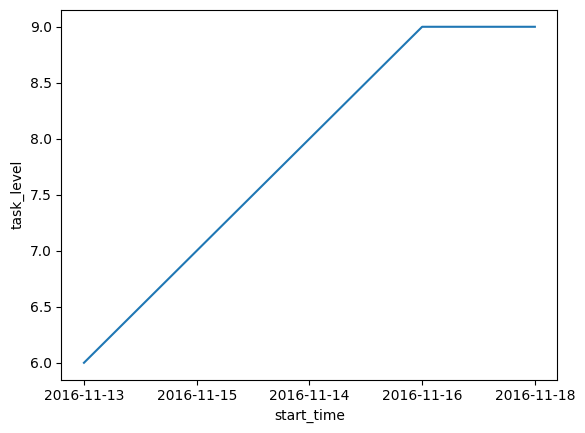

In [112]:
sns.lineplot(data=d, x="start_time", y="task_level")

In [114]:
d = p[p["task_type_id"] == 73]
d

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,disorder_id,start_time,start_time_min,end_time,end_time_min,deficit_id
44864250,5159050,90772,73,2,3,1.000,4,10y,1956,9,2016-11-13,2016-11-13 16:07:50,2016-11-13,2016-11-13 16:08:19,"{1, 2, 3, 4, 5, 6, 7, 8}"
44864251,5159157,90772,73,2,3,0.917,4,10y,1956,9,2016-11-13,2016-11-13 16:17:05,2016-11-13,2016-11-13 16:17:37,"{1, 2, 3, 4, 5, 6, 7, 8}"
44864265,5163685,90772,73,4,5,1.000,4,10y,1956,9,2016-11-14,2016-11-14 04:49:53,2016-11-14,2016-11-14 04:50:57,"{1, 2, 3, 4, 5, 6, 7, 8}"
44864266,5175019,90772,73,4,10,0.950,4,10y,1956,9,2016-11-15,2016-11-15 03:46:35,2016-11-15,2016-11-15 03:48:47,"{1, 2, 3, 4, 5, 6, 7, 8}"
44864271,5208835,90772,73,5,5,1.000,4,10y,1956,9,2016-11-18,2016-11-18 04:59:33,2016-11-18,2016-11-18 05:00:59,"{1, 2, 3, 4, 5, 6, 7, 8}"
44864277,5186551,90772,73,6,5,0.825,4,10y,1956,9,2016-11-16,2016-11-16 05:15:34,2016-11-16,2016-11-16 05:18:12,"{1, 2, 3, 4, 5, 6, 7, 8}"


<Axes: xlabel='start_time', ylabel='task_level'>

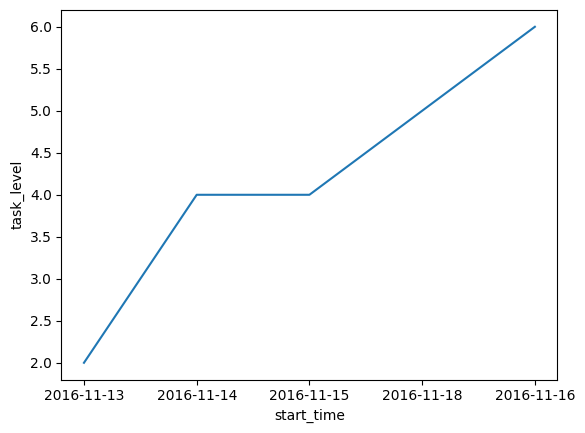

Bad pipe message: %s [b';\x1b\xd7\xb9\xc3\xe0\xc5gg\xd8\xdan|\x7f\x9e\xe8\xa6\xc6\x00\x01p\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00/\x000\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00g\x00h\x00i\x00j\x00k\x00l\x00m\x00A\x00B\x00C\x00D\x00E\x00F\x00\x84\x00\x85\x00\x86\x00\x87\x00\x88\x00\x89\x00\xba\x00\xbb\x00\xbc\x00']
Bad pipe message: %s [b"\xbe\x00\xbf\x00\xc0\x00\xc1\x00\xc2\x00\xc3\x00\xc4\x00\xc5\x00\x9c\x00\x9d\x00\x9e\x00\x9f\x00\xa0\x00\xa1\x00\xa2\x00\xa3\x00\xa4\x00\xa5\x00\xa6\x00\xa7\xc0\x01\xc0\x02\xc0\x03\xc0\x04\xc0\x05\xc0\x06\xc0\x07\xc0\x08\xc0\t\xc0\n\xc0\x0b\xc0\x0c\xc0\r\xc0\x0e\xc0\x0f\xc0\x10\xc0\x11\xc0\x12\xc0\x13\xc0\x14\xc0\x15\xc0\x16\xc0\x17\xc0\x18\xc0\x19\xc0#\xc0$\xc0%\xc0&\xc0'\xc0(\xc0)\xc0*\xc0+\xc0,\xc0-\xc0.\xc0/\xc01\xc00\xc02\xc0s\xc0r\x

In [115]:
sns.lineplot(data=d, x="start_time", y="task_level")